<a href="https://colab.research.google.com/github/WailAlqadhi/Final-Assignment2-bigdata/blob/master/Final_Assignment2_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import pandas 
import pandas as pd

# Use pandas to read in recent_grads.csv
sales_data = pd.read_csv('sales_data_na.csv')

#explore our data:
print(sales_data.dtypes)

print(sales_data.describe())

# Print the shape
print(sales_data.shape[:])

# check for missing values in each column
print(sales_data.isnull().sum())

# check for missing values in the entire DataFrame
print(sales_data.isnull().values.any())


# Remove rows with missing data:
#I chose this method because it is efficient, easy and does not affect the meaning of the data:
sales_data = sales_data.dropna()

#again check if there is missing value so the result is false:
print(sales_data.isnull().values.any())

# remove duplicated rows
sales_data_clean = sales_data.drop_duplicates()

# print the number of rows before and after removing duplicated rows
print('Number of rows before:', len(sales_data))
print('Number of rows after:', len(sales_data_clean))


Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age        float64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity        int64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object
                 Day           Year   Customer_Age  Order_Quantity  \
count  113037.000000  113037.000000  113036.000000   113037.000000   
mean       15.665817    2014.401727      35.919052       11.912073   
std         8.781555       1.272512      11.021877       10.193974   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.00

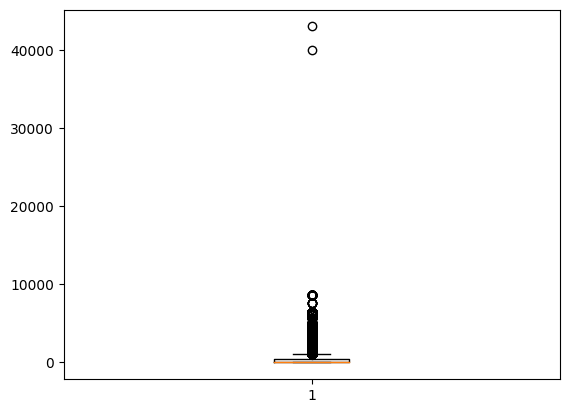

In [8]:
#for example we check for outliers in the column of cost:
import matplotlib.pyplot as plt

# Create a boxplot of a column
plt.boxplot(sales_data['Cost'])
plt.show()

In [9]:
#Column types can signal unexpected data value:
#we inspect for data types in each column:
print(sales_data.dtypes)

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age        float64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity        int64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object


<Axes: >

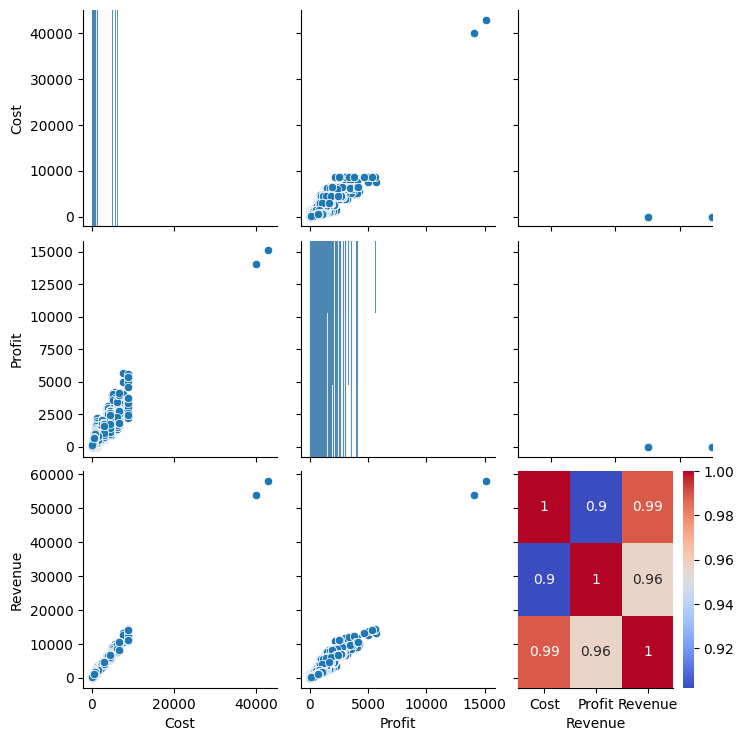

In [10]:
#to do visualize the different columns and find the relation between these columns such as cost, profit and revenue:
import seaborn as sns

# we plot scatterplot matrix of cost, profit, and revenue:
sns.pairplot(data=sales_data, vars=['Cost', 'Profit', 'Revenue'])

# we creat a heatmap of the correlation between cost, profit, and revenue
sns.heatmap(data=sales_data[['Cost', 'Profit', 'Revenue']].corr(), annot=True, cmap='coolwarm')


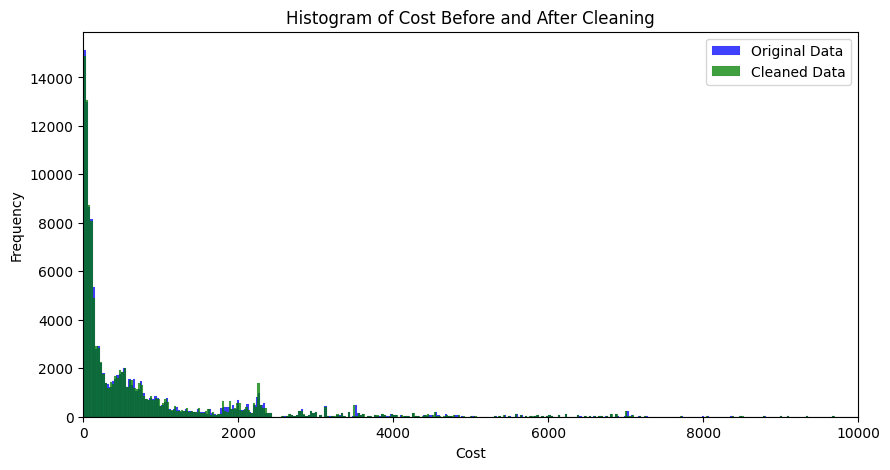

In [11]:
#Visualize the data before and after the cleaning process:
#we will do that for Cost column and we can rpeat the process for all of columns:
# Plot a histogram of the 'cost' column in the original data:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(sales_data['Revenue'], kde=False, color='blue', label='Original Data')

# Plot a histogram of the 'cost' column in the cleaned data:
sns.histplot(sales_data_clean['Revenue'], kde=False, color='green', label='Cleaned Data')

# Set the range of x values to show
ax.set_xlim([0, 10000])

# Add labels and legend
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Cost Before and After Cleaning')
plt.legend()

# Show the plot
plt.show()